# Inspecting the Detected Bounding Boxes

## After Applying MTCNN on CelebA

In [23]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [24]:
image_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/CelebA_original"
bbox_csv_path = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/list_bbox_celeba_mtcnn.csv"

bbox_df = pd.read_csv(bbox_csv_path)

In [25]:
def display_image_with_bbox(image_id: str):
    image_path = os.path.join(image_dir, image_id)
    img = Image.open(image_path)

    bbox = bbox_df[bbox_df["image_id"] == image_id]
    if bbox.empty:
        print(f"No bounding box found for {image_id}")
        return

    x, y, width, height = bbox.iloc[0][["x_1", "y_1", "width", "height"]]

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    rect = patches.Rectangle(
        (x, y), width, height, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.add_patch(rect)
    ax.set_title(f"Image: {image_id}")
    plt.axis("off")
    plt.show()

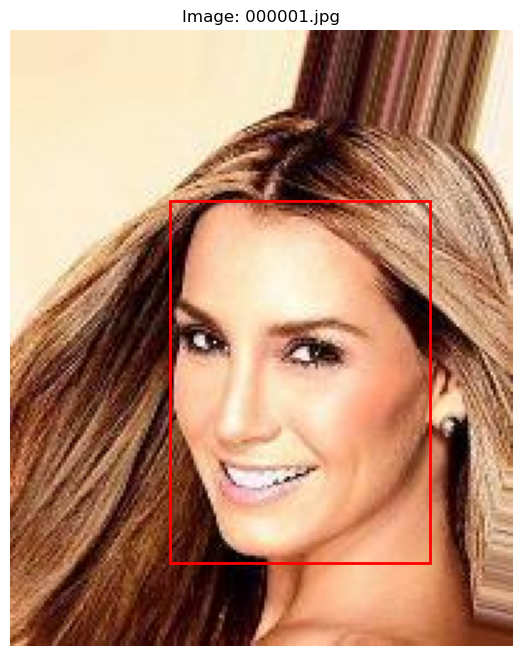

In [26]:
example_image_id = bbox_df["image_id"].iloc[0]
display_image_with_bbox(example_image_id)

### Some faces were not recognized by MTCNN. Examples below.

In [27]:
def display_image_by_name(image_id: str):
    image_path = os.path.join(image_dir, image_id)
    img = Image.open(image_path)

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    ax.set_title(f"Image: {image_id}")
    plt.axis("off")
    plt.show()

In [28]:
all_images = set(
        sorted(f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png')))
    )
bbox_df = pd.read_csv(bbox_csv_path)
recognized_images = set(bbox_df['image_id'])
unrecognized_images = list(all_images - recognized_images)
unrecognized_images = sorted(unrecognized_images)

In [29]:
print(f"Unrecognized images ({len(unrecognized_images)}): {unrecognized_images}")

Unrecognized images (782): ['000120.jpg', '000149.jpg', '000199.jpg', '000627.jpg', '000901.jpg', '001401.jpg', '002432.jpg', '002583.jpg', '002779.jpg', '002920.jpg', '003400.jpg', '003626.jpg', '003723.jpg', '003854.jpg', '003928.jpg', '003946.jpg', '004118.jpg', '004602.jpg', '004700.jpg', '004732.jpg', '004889.jpg', '004932.jpg', '005057.jpg', '005198.jpg', '005338.jpg', '006010.jpg', '006531.jpg', '006721.jpg', '007037.jpg', '007087.jpg', '007581.jpg', '007726.jpg', '007917.jpg', '007959.jpg', '007996.jpg', '008181.jpg', '008574.jpg', '009119.jpg', '009259.jpg', '010091.jpg', '011060.jpg', '011646.jpg', '011793.jpg', '012306.jpg', '012629.jpg', '012772.jpg', '013374.jpg', '013654.jpg', '014577.jpg', '014769.jpg', '014823.jpg', '014999.jpg', '015026.jpg', '015549.jpg', '015821.jpg', '016293.jpg', '016303.jpg', '016530.jpg', '017009.jpg', '017171.jpg', '017282.jpg', '018205.jpg', '018309.jpg', '018599.jpg', '018654.jpg', '018946.jpg', '018991.jpg', '019205.jpg', '019377.jpg', '01940

In [30]:
percentage_unrecognized = (len(unrecognized_images) / len(all_images)) * 100
print(f"Percentage of unrecognized images: {percentage_unrecognized:.2f}%") 

Percentage of unrecognized images: 0.39%


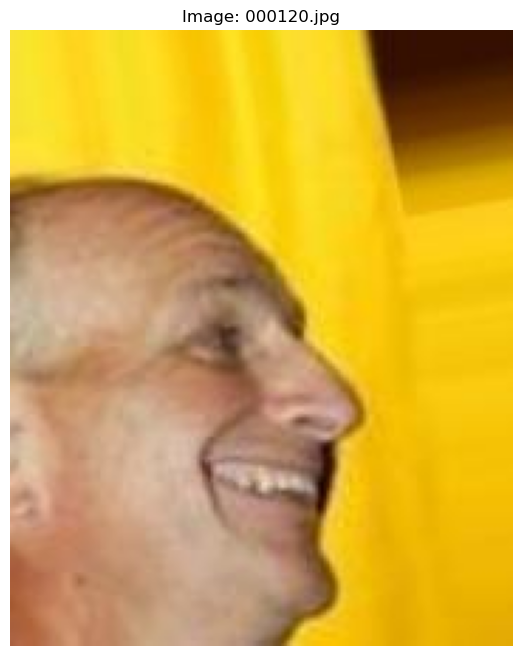

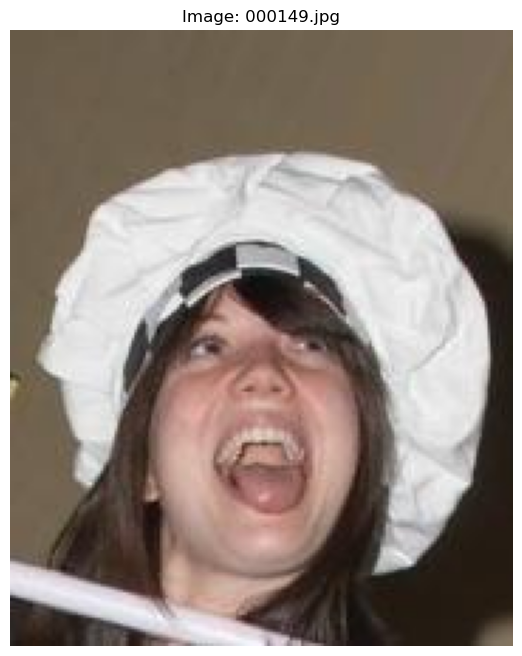

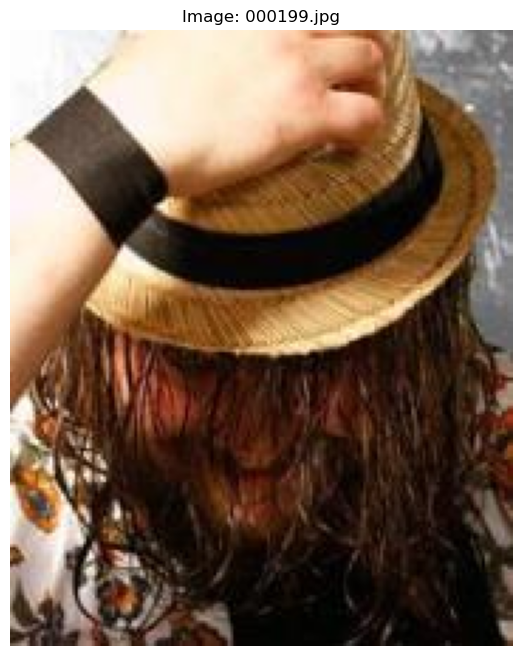

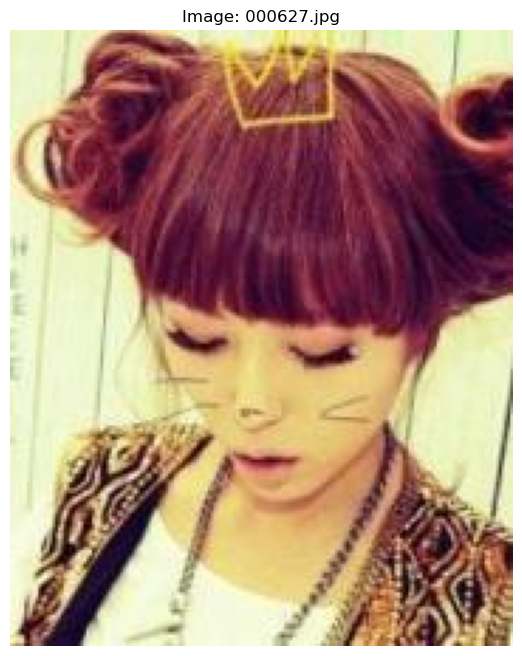

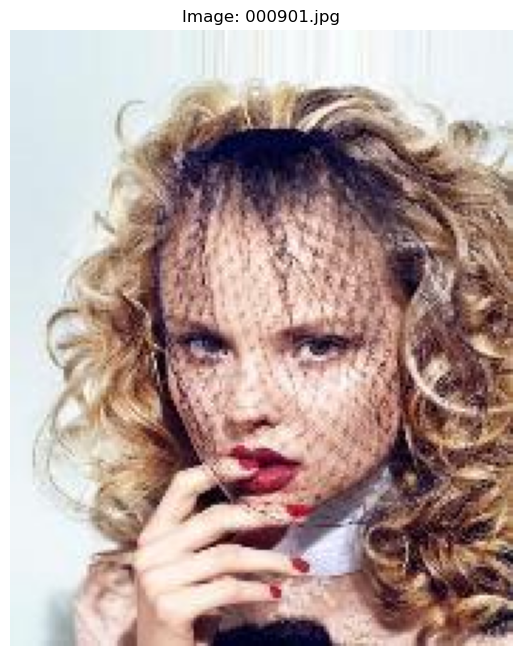

In [31]:
display_image_by_name(unrecognized_images[0])
display_image_by_name(unrecognized_images[1])
display_image_by_name(unrecognized_images[2])
display_image_by_name(unrecognized_images[3])
display_image_by_name(unrecognized_images[4])

### Sort Out Unrecognized Faces

In [10]:
sorted_out_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/CelebA_sorted_out"

In [12]:
def move_unrecognized_images():
    bbox_df = pd.read_csv(bbox_csv_path)
    recognized_images = set(bbox_df['image_id'])

    all_images = set(
        f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))
    )
    unrecognized_images = all_images - recognized_images
    os.makedirs(sorted_out_dir, exist_ok=True)

    for image in unrecognized_images:
        source_path = os.path.join(image_dir, image)
        destination_path = os.path.join(sorted_out_dir, image)
        try:
            shutil.move(source_path, destination_path)
            print(f"Moved: {image}")
        except Exception as e:
            print(f"Error moving {image}: {e}")

    print(f"Finished moving {len(unrecognized_images)} unrecognized images to {sorted_out_dir}.")


In [13]:
def move_unrecognized_images_back():
    os.makedirs(image_dir, exist_ok=True)
    images = [f for f in os.listdir(sorted_out_dir) if f.lower().endswith(('.jpg', '.png'))]

    for image in images:
        source_path = os.path.join(sorted_out_dir, image)
        destination_path = os.path.join(image_dir, image)
        try:
            shutil.move(source_path, destination_path)
            print(f"Moved back: {image}")
        except Exception as e:
            print(f"Error moving {image} back: {e}")

    print(f"Finished moving {len(images)} images back to {image_dir}.")

In [32]:
move_unrecognized_images()
# move_unrecognized_images_back()

Moved: 028580.jpg
Moved: 103934.jpg
Moved: 154579.jpg
Moved: 151176.jpg
Moved: 055657.jpg
Moved: 191321.jpg
Moved: 080628.jpg
Moved: 139996.jpg
Moved: 152466.jpg
Moved: 157701.jpg
Moved: 109894.jpg
Moved: 027468.jpg
Moved: 164481.jpg
Moved: 033216.jpg
Moved: 113243.jpg
Moved: 074844.jpg
Moved: 077942.jpg
Moved: 063507.jpg
Moved: 040320.jpg
Moved: 074618.jpg
Moved: 067190.jpg
Moved: 024850.jpg
Moved: 187721.jpg
Moved: 102061.jpg
Moved: 057435.jpg
Moved: 072776.jpg
Moved: 171573.jpg
Moved: 137880.jpg
Moved: 182021.jpg
Moved: 084472.jpg
Moved: 142324.jpg
Moved: 018946.jpg
Moved: 027556.jpg
Moved: 155843.jpg
Moved: 145009.jpg
Moved: 045991.jpg
Moved: 106765.jpg
Moved: 030912.jpg
Moved: 008181.jpg
Moved: 037125.jpg
Moved: 071773.jpg
Moved: 032108.jpg
Moved: 157304.jpg
Moved: 048799.jpg
Moved: 043571.jpg
Moved: 145374.jpg
Moved: 133222.jpg
Moved: 031125.jpg
Moved: 008574.jpg
Moved: 154288.jpg
Moved: 061568.jpg
Moved: 044503.jpg
Moved: 133476.jpg
Moved: 086585.jpg
Moved: 153506.jpg
Moved: 004

## RVL-CDIP

In [1]:
!pip install paddlepaddle-gpu==3.0.0b1 -i https://www.paddlepaddle.org.cn/packages/stable/cu118/

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cu118/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 MB 1.2 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 4.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━